In [1]:
# import 
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Zadanie 
Wczytaj ze zbioru danych [ML-datasets](https://github.com/matzim95/ML-datasets) zeszyt ves-usd.csv i pokaż zależność boliwara od dolara amerykańskiego.

In [2]:
ves_usd = pd.read_html("https://github.com/matzim95/ML-datasets/blob/master/ves-usd.csv")[0].drop("Unnamed: 0", axis=1)

In [3]:
ves_usd.head()

,Date,Rate,ISO Code From,ISO Code To
0,3/1/2019 Friday,3295.300,USD,VES
1,3/3/2019 Sunday,3295.300,USD,VES
2,3/4/2019 Monday,3294.905,USD,VES
3,3/5/2019 Tuesday,3294.810,USD,VES
4,3/6/2019 Wednesday,3294.905,USD,VES


In [4]:
ves_usd["name_of_day"] = ves_usd.Date.apply(lambda x : x.split()[1])
ves_usd["Date"] = ves_usd.Date.apply(lambda x : x.split()[0])

ves_usd["Date"]  = pd.to_datetime( ves_usd["Date"], format='%m/%d/%Y', errors= "coerce")

ves_usd.head()

,Date,Rate,ISO Code From,ISO Code To,name_of_day
0,2019-03-01,3295.300,USD,VES,Friday
1,2019-03-03,3295.300,USD,VES,Sunday
2,2019-03-04,3294.905,USD,VES,Monday
3,2019-03-05,3294.810,USD,VES,Tuesday
4,2019-03-06,3294.905,USD,VES,Wednesday


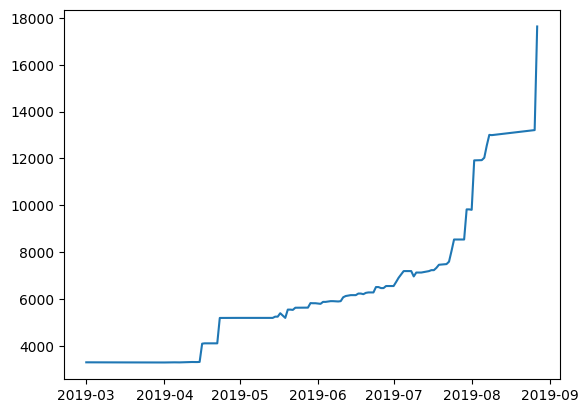

In [5]:
fig, ax = plt.subplots()

ax.plot(ves_usd.Date, ves_usd.Rate)

plt.show();

# Zadanie
Skorzystaj z parametrów poznanych na slajdzie 14 i 15 i opisz wykres z poprzedniego zadania.

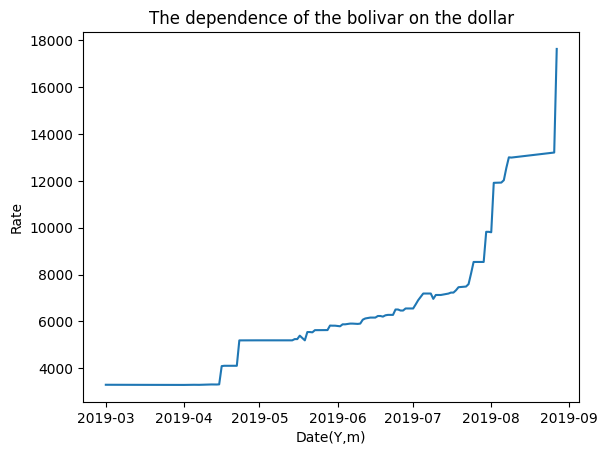

In [6]:
fig, ax = plt.subplots()

ax.plot(ves_usd.Date, ves_usd.Rate)

ax.set_title("The dependence of the bolivar on the dollar")
ax.set_xlabel("Date(Y,m)")
ax.set_ylabel("Rate")

plt.show();

# Zadanie 
Dokonaj analizy danych zbioru medali ([olympic.csv](https://github.com/matzim95/ML-datasets) ) i wykonaj wykres słupkowy pokazujący ile medali zdobył dany kraj. Za pomocą kolorów oznacz czy medal był złoty, srebrny czy brązowy.

In [7]:
olympic = pd.read_csv(r"C:\Users\user\Desktop\Data Science\SDA\SDA szkolenie\Przetwarzanie_zbiorów_danych\files_for_Processing_datasets\ML-datasets-master\olympic.csv") # https://github.com/matzim95/ML-datasets/blob/master/olympic.csv

In [8]:
olympic_medal = pd.DataFrame()

olympic_medal["Gold"] = np.where(olympic["Medal"] == "Gold", 1, 0) 
olympic_medal["Silver"] = np.where(olympic["Medal"] == "Silver", 1, 0)
olympic_medal["Bronze"] = np.where(olympic["Medal"] == "Bronze", 1, 0)

olympic_medal["NOC"] = olympic["NOC"]
# olympic_medal.index = olympic["NOC"]

olympic_medal = olympic_medal.groupby(["NOC"], as_index = False ).agg( Gold = ("Gold","sum"),
                                                                       Silver = ("Silver","sum"),
                                                                       Bronze = ("Bronze","sum"))


olympic_medal = olympic_medal.loc[(olympic_medal.Gold > 0 ) &
                                 (olympic_medal.Silver > 0 ) &
                                 (olympic_medal.Bronze > 0 )]
olympic_medal.sort_values("Bronze", inplace= True, ascending= False)
olympic_medal.reset_index(drop=True, inplace= True )

olympic_medal.head()

,NOC,Gold,Silver,Bronze
0,USA,2638,1641,1358
1,GER,745,674,746
2,URS,1082,732,689
3,FRA,501,610,666
4,GBR,678,739,651


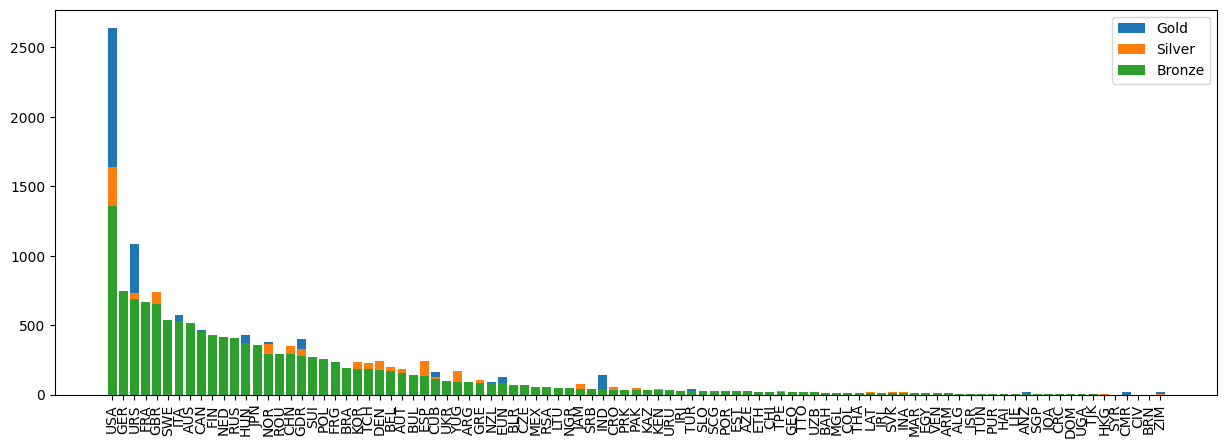

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(x= olympic_medal.index, height= olympic_medal["Gold"],
       tick_label = olympic_medal.NOC , label= "Gold")

ax.bar(x= olympic_medal.index, height= olympic_medal["Silver"],
       tick_label = olympic_medal.NOC , label= "Silver")
ax.bar(x= olympic_medal.index, height= olympic_medal["Bronze"],
       tick_label = olympic_medal.NOC , label= "Bronze")

ax.xaxis.set_tick_params(rotation = 90)

ax.legend()
plt.show()

# Zadanie
Korzystając ze zbioru medali, stwórz wykres punktowy pokazujący zależność wzrostu, wagi i liczby zdobytych przez zawodników medali na igrzyskach.

In [10]:
olympic.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


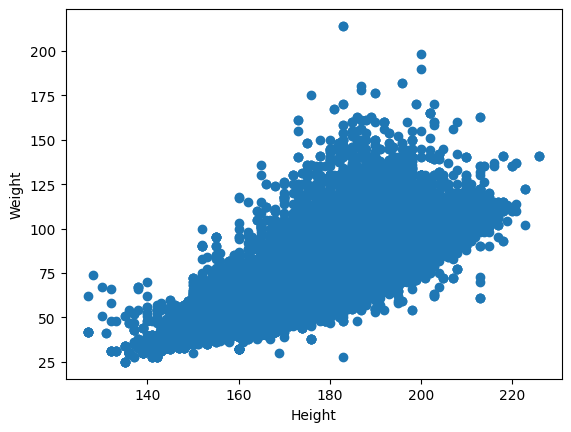

In [15]:
# Height Weight Medal

fig, ax = plt.subplots()

ax.scatter(olympic.Height, olympic.Weight)

ax.set_xlabel("Height")
ax.set_ylabel("Weight")

plt.show()

# Zadanie
Wczytaj zbiór co2 i wyświetl wykres punktowy wartości co2.

In [20]:
co_2 = pd.read_html("https://github.com/matzim95/ML-datasets/blob/master/co2.csv")[0].drop("Unnamed: 0",axis =1)
co_2.head()

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1


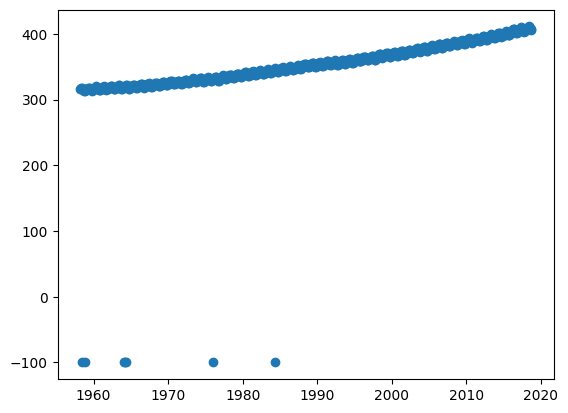

In [34]:
fig, ax = plt.subplots()

ax.scatter(x= co_2["Decimal Date"], y= co_2["Average"] )

plt.show()

# Zadanie
Wykonaj wykresy boxplot, violinplot oraz swarmplot dla zbioru danych olimpijczyków za pomocą biblioteki seaborn.

In [ ]:
olimpic = pd.read_html("")[0]#.drop("", axis= 1)


# error -> (Sorry about that, but we can’t show files that are this big right now.)

[Odpowiedzi do zadań](http://localhost:8888/files/Desktop/Data%20Science/SDA/SDA%20szkolenie/Wizualizacja%20danych/Odpowiedzi%20do%20zada%C5%84/Wizualizacja_danych__odpowiedzi.pdf)